# Python tutorial 1.2 - **Image segmentation and tracking**

## **Trajectories analysis for videos tracked with idtracker.ai**

------
## UQ-Bio Summer School
## 2023, June 1
------

```
Instructor:Ana Carolina Pádua
Contact: carolina.padua@research.fchampalimaud.org

Champalimaud Center for the Unknown, Lisbon (Portugal)
Research group: Mathematics of collective behavior and intelligence
```



<img src= https://www.singularityweblog.com/wp-content/uploads/2018/08/Swarm.jpg alt="drawing" width="600"/>



# What is **Idtracker.ai**?

[Idtracker.ai](https://idtracker.ai/en/latest/) is an application for tracking animals in laboratorial conditions.

The objective of *idtracker.ai* is to detect and identify animals in videos, in a way that their trajectories can be further extracted and analyzed.

*idtracker.ai* allows:
- obtaining animal trajectories for research in Neuroscience, Biomedical Engineering, Pharmaceutical fields; 
- tracking large datasets efficiently;
- analysing trajectories in an automatic and reproducible manner. 


Features:
- Open-source
- Tested in groups of up to 100 animals
- Unmarked animals can be used
- Species agnostic (has been tested for fish, ants, fruit flies, mice)


<img src= https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/video_100zb.PNG alt="drawing" width="600"/>

You can watch [this video](https://www.youtube.com/watch?v=daSNVpJJBGE) of 100 unmarked zebrafish on Youtube.

#### Project contributors

* Jordi Torrents (2022-)
* Ana Carolina Pádua (2021-)
* Dean Rance (2021-)
* Tiago Costa (2020-)
* Antonio Ortega (2021-2022)
* Madalena Valente (2020-2021)
* Ricardo Ribeiro (2018-2020)
* Mattia G. Bergomi (2015-2018)
* Francisco J.H. Heras (2015-2022)
* Francisco Romero-Ferrero (2015-2022)

# How to get started on idtracker.ai?

#### Here is what you need to have before running idtracker.ai:
1. Videos of animals moving
2. A computer with a Linux or Windows operating system
3. Know-how on data analysis with python (numpy, matplotlib, ...)


### 1. Experimental set-up

This is our experimental set-up, in which we have a camera above the arena that records videos of fish swimming. 

<img src= https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/camera_above_arena.jpg alt="drawing" width="600"/>

The arena is filled with water, where the groups of fish swim. This is a view from the camera:

<img src= https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/arena_setup_topview.png alt="drawing" width="600"/>

In [7]:
# refer about location of center and radius of the arena
#add images of the surroundings

### 2. Installation: 

For installing idtracker.ai you should follow the instructions on the [website](https://idtracker.ai/en/latest/user_guide/installation.html#). It has been tested on Windows and Linux (instructions for Ubuntu). 

**Graphical User Interface (GUI) / Segmentation app**

The segmentation app is a *Graphical User Interface* (GUI), where the user defines the parameters for the tracking that will enable the program to distinguish the animals (which are represented as *blobs*) from the background in each frame.

<img src=https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/segmentation_app_light.png alt="drawing" width="900"/>

When you click *close window and track video*, idtracker.ai starts running. 

### **How it works: algorithm**


The objective of *idtracker.ai* is to detect and identify the animals in videos, in a way that their trajectories can be further extracted and analyzed. 

The *idtracker.ai* algorithms consists of 8 processing steps that run sequentially one after the one. 


<img src=https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/idtracker_train_CNN_w_fragments.JPG alt="drawing" width="900"/>

1) **Animals detection**: extraction of small images (*blobs*) of each animal in each frame of the video.
The parameters used in this step are defined by the user with the *Graphical User Interface* (GUI).

2) **Crossing detection**: selects images that are crearly single individuals or several individuals (based on a set of heuristics) and uses it to classify all the images in the video as *individuals* or *crossings*.

<img src=https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/ontogeny_20221227_A_evident_1crossing.png alt="drawing" width="600"/>

3 heuristics for determining if a blob is a crossing:
1. $N_{b}$ (number of blobs) < N (number of animals)
2. $A_{b}$ (Blob's area) > $m_{a} +4*std_{a}$ (median + 4* standard deviation of all blobs identified as animals by the first heuristic).
3. Spacial and temporal coherence of the video: if the first/last blob of a sequence  overlaps with more than 1 other blob in the last/next frame, it is labeled as a potential crossing. 

To classify the remaining blobs, idtracker.ai uses a Convolutional Neural Network for crossing detection (called cdCNN) trained with the blobs previously labelled by the heuritics. 

3) **Fragmentation**: collection of images of the same individual in consecutive frames (individual fragments).

Global fragment: intervals of the video where all animals are separated (without crossings).

5) **Cascade of training and identification protocols**: gathers images from the global fragments (iteratively) and trains the idCNN to assign identities to all the individual fragments in the video.

<img src=https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/train_CNN_example.JPG alt="drawing" width="900"/>

6) Residual identification: Bayesian framework to identify the most difficult individual fragments.

7) Post-processing: detects unnatural changes of speed in the individuals.

8) Trajectories generation: creates individual trajectories of each animal by grouping the locations of the identified animals in each frame of the video.

The output is a set of folders that contain all the relevant information about the analysis.

<img src=https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/idtrackerai_output_structure.PNG alt="drawing" width="400"/>

idtracker.ai extracts three different types of trajectories:
* ***trajectories.npy***: trajectories with NaN when the individual is crossing with another individual
* ***trajectories_wo_gaps.npy***: trajectories with the NaN values of the crossings interpolated. Some parts of the trajectories might still have NaN values if the individual was occluded or not segmented on those frames.
* ***trajectories_wo_identities.npy***: same as trajectories.npy but the columns indices do not correspond to individuals identities. This trajectories are generated when tracking a video with the option "Track without identities".

These trajectory files can be found in their corresponding subfolders in the *session folder* generated by idtracker.ai. 

Here we are loading some example ***trajectories_wo_gaps.npy*** that we will download automatically to Google Colab.

Find more information of how idtracker.ai works on:
[Idtracker.ai's GitLab page](https://gitlab.com/polavieja_lab/idtrackerai)
and [Romero-Ferrero, F., Bergomi, M.G., Hinz, R.C., Heras, F.J.H., de Polavieja, G.G., Nature Methods, 2019. idtracker.ai: tracking all individuals in small or large collectives of unmarked animals](https://www.nature.com/articles/s41592-018-0295-5)

## 3) Data analysis

For statistics analysis, there is a very useful python package created to perform basic trajectories analysis, named [trajectorytools](https://github.com/fjhheras/trajectorytools). This library has some utils to study and plot 2D trajectories.

[trajectorytools](https://pypi.org/project/trajectorytools/) is a python library that can be found in PyPi. Let's install it using pip.

In [8]:
!pip install trajectorytools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing libraries

Import the necessary python modules for our analysis

---



In [9]:
import trajectorytools as tt #Library to study and plot 2D trajectories
import numpy as np # provide mathematical functions to operate on arrays
import matplotlib.pyplot as plt # plotting library

import os #Library to work with the operating system
from os import path

Mount Google Drive to access files from there

---



In [10]:
from google.colab import drive # connect to drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To understand what the trajectorytools python module contains we can use the  help function

---

In [11]:
help(tt)

Help on package trajectorytools:

NAME
    trajectorytools - # from . import animation

PACKAGE CONTENTS
    animation (package)
    collective
    constants
    fish_bouts (package)
    geometry
    interpolate
    plot (package)
    socialcontext (package)
    trajectories

DATA
    EPSILON = 1e-16

FILE
    /usr/local/lib/python3.10/dist-packages/trajectorytools/__init__.py




In [12]:
help(tt.trajectories)

Help on module trajectorytools.trajectories in trajectorytools:

NAME
    trajectorytools.trajectories

CLASSES
    builtins.object
        Trajectory
            CenterMassTrajectory
            Trajectories
                FishTrajectories
                TrajectoriesWithPoints
    
    class CenterMassTrajectory(Trajectory)
     |  CenterMassTrajectory(trajectories, params)
     |  
     |  Method resolution order:
     |      CenterMassTrajectory
     |      Trajectory
     |      builtins.object
     |  
     |  Data and other attributes defined here:
     |  
     |  own_params = False
     |  
     |  ----------------------------------------------------------------------
     |  Methods inherited from Trajectory:
     |  
     |  __init__(self, trajectories, params)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  __len__(self)
     |  
     |  acceleration_towards(self, point)
     |  
     |  angle_towards(self, point)
     |  
     |

## Get the trajectories files

In [13]:
print(os.listdir('./'))

if path.exists('/content/trajectories_wo_gaps/') == False:
  os.mkdir('/content/trajectories_wo_gaps') # command to create a directory

os.chdir('/content/trajectories_wo_gaps') # command used to change the current working directory
!pwd # command that writes the full pathname of the current working directory
!ls # command to list computer files and directories 

!wget https://github.com/acpadua/uq-bio23/raw/development/trajectories_files/GD_Ontogeny_Dec22/20221227/GroupA/twg_GD_20221227_A.npy
!wget https://github.com/acpadua/uq-bio23/raw/development/trajectories_files/GD_Ontogeny_Dec22/20221227/GroupB/twg_GD_20221227_B.npy

os.chdir('/content/')

trajectories_path = './trajectories_wo_gaps/twg_GD_20221227_A.npy'

['.config', 'drive', 'sample_data']
/content/trajectories_wo_gaps
--2023-05-26 01:02:35--  https://github.com/acpadua/uq-bio23/raw/development/trajectories_files/GD_Ontogeny_Dec22/20221227/GroupA/twg_GD_20221227_A.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/acpadua/uq-bio23/development/trajectories_files/GD_Ontogeny_Dec22/20221227/GroupA/twg_GD_20221227_A.npy [following]
--2023-05-26 01:02:35--  https://raw.githubusercontent.com/acpadua/uq-bio23/development/trajectories_files/GD_Ontogeny_Dec22/20221227/GroupA/twg_GD_20221227_A.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14757608 

## Loading `.npy` files

The trajectories files are python dictionaries that include the trajectories as a numpy array of dimensions (frames, number_of_animals, coordinates).

2 different options for loading trajectories

The simplest way

In [14]:
trajectories_dict = np.load(trajectories_path, allow_pickle=True).item()

In [15]:
print(trajectories_dict.keys())

dict_keys(['trajectories', 'version', 'video_path', 'frames_per_second', 'body_length', 'stats', 'id_probabilities', 'areas', 'setup_points', 'identities_groups'])


The more advanced way, which allows to control parameters such as *smooth* and *interpolation*

In [16]:
tr = tt.Trajectories.from_idtrackerai(trajectories_path,
                                      interpolate_nans=True,
                                      smooth_params={'sigma': 0})

## Exploring properties and methods 

To see a description of all the methods, properties and atributes associated to tr, we can use `help` and `dir`.

---



In [17]:
help(tr)

Help on Trajectories in module trajectorytools.trajectories object:

class Trajectories(Trajectory)
 |  Trajectories(trajectories, params)
 |  
 |  Method resolution order:
 |      Trajectories
 |      Trajectory
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, val)
 |  
 |  __init__(self, trajectories, params)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  export_trajectories_to_csv(self, csvfilename, delimiter=',', **kwargs)
 |      Export trajectories to a csv plain text file.
 |      
 |      :param csvfilename: Name of the csv file to be created
 |      :param delimiter: Delimiter (default is ",")
 |      :param kwargs: Other keyword arguments for numpy.savetxt
 |  
 |  normalise_by(self, normaliser)
 |  
 |  resample(self, *args, **kwargs)
 |      # Methods with side effects
 |  
 |  restrict_individuals(self, val)
 |  
 |  save(self, filename)
 |  
 |  -------------

In [18]:
dir(tr)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_a',
 '_dict_to_save',
 '_projection_vector_towards',
 '_s',
 '_v',
 'a',
 'acceleration',
 'acceleration_towards',
 'angle_towards',
 'center_of_mass',
 'curvature',
 'distance_to',
 'distance_to_center',
 'distance_to_origin',
 'distance_travelled',
 'e',
 'e_towards',
 'estimate_center_and_radius_from_locations',
 'export_trajectories_to_csv',
 'from_idtracker',
 'from_idtracker_',
 'from_idtrackerai',
 'from_positions',
 'identity_labels',
 'interindividual_distances',
 'keys_to_copy',
 'load',
 'mean_interindividual_distances',
 'new_length_unit',
 'new_time_unit',
 'normal_acceleration',

We can check for instance variables in the dictionary.

In [19]:
tr.__dict__

{'_s': array([[[ 961.8530432 , 2205.16761274],
         [3048.34695412, 2709.73218016],
         [1583.62991393, 2816.21338296],
         ...,
         [2608.01063507, 2051.21839866],
         [2400.92988235, 3077.8907451 ],
         [1421.63601957, 1769.26585433]],
 
        [[ 971.0842821 , 2204.84535104],
         [3037.55025023, 2737.98662729],
         [1557.62395563, 2797.14253817],
         ...,
         [2599.52206213, 2083.53827105],
         [2354.72034429, 3086.17026604],
         [1483.52710592, 1784.65628765]],
 
        [[ 977.97064306, 2204.58993476],
         [3022.56147272, 2766.74030243],
         [1520.65705788, 2769.91329215],
         ...,
         [2593.11432355, 2109.89788862],
         [2303.10051772, 3092.48936679],
         [1544.26883514, 1798.53109072]],
 
        ...,
 
        [[ 767.64450355, 1619.00407801],
         [1724.7505989 , 1757.05013689],
         [3055.4205665 , 1589.93643952],
         ...,
         [2035.18466454,  832.49620163],
         [22

In [20]:
print(tr.__dict__.keys())

dict_keys(['_s', '_v', '_a', 'params', 'center_of_mass'])


In [21]:
tr.params

{'displacement': array([0., 0.]),
 'length_unit': 1,
 'length_unit_name': 'px',
 'time_unit': 1,
 'time_unit_name': 'frames',
 'interpolate_nans': True,
 'smooth_params': {'sigma': 0},
 'construct_method': 'from_idtrackerai',
 'radius': 1570.0873244558065,
 'radius_px': 1570.0873244558065,
 '_center': array([2112.4966985 , 1937.88940901]),
 'frame_rate': 32,
 'body_length_px': 165.0,
 'path': './trajectories_wo_gaps/twg_GD_20221227_A.npy'}

Let's check one of the readonly properties: number of individuals

In [22]:
tr.number_of_individuals

12

It gives the number of fish used in the experiment.

`frame_rate` and `body_length_px` are taken from the `.npy` file. Note that the `body_lenght_px` is estimated by *trajectorytools* as the median of all the diagonals of the bounding boxes generated during the segmentation step in *idtracker.ai*. Bear in mind that this might not be a fair estimation in some cases. `path` is the path where the trajectories were loaded from.

In case you want to know the video frame rate (frames/s):

In [23]:
tr.params['frame_rate']

32

### **Ex1:** 

Write a line of code that produces the following output: `The median body length of the animals in pixels is  value_of_body_length`.

# **Position array** (X and Y coordinates)

The trajectories are given in pixels of the video frames.

<img src= https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/s_coordinates.jpg alt="drawing" width="600"/>

Inside the tr dictionary, we can find an array of positions (tr.s).
It is an array that contains information about the center of mass of each fish in each frame of the video.

In [24]:
tr.s

array([[[ 961.8530432 , 2205.16761274],
        [3048.34695412, 2709.73218016],
        [1583.62991393, 2816.21338296],
        ...,
        [2608.01063507, 2051.21839866],
        [2400.92988235, 3077.8907451 ],
        [1421.63601957, 1769.26585433]],

       [[ 971.0842821 , 2204.84535104],
        [3037.55025023, 2737.98662729],
        [1557.62395563, 2797.14253817],
        ...,
        [2599.52206213, 2083.53827105],
        [2354.72034429, 3086.17026604],
        [1483.52710592, 1784.65628765]],

       [[ 977.97064306, 2204.58993476],
        [3022.56147272, 2766.74030243],
        [1520.65705788, 2769.91329215],
        ...,
        [2593.11432355, 2109.89788862],
        [2303.10051772, 3092.48936679],
        [1544.26883514, 1798.53109072]],

       ...,

       [[ 767.64450355, 1619.00407801],
        [1724.7505989 , 1757.05013689],
        [3055.4205665 , 1589.93643952],
        ...,
        [2035.18466454,  832.49620163],
        [2260.82267032, 1388.83619617],
        [

What is the shape of the array *tr.s*, and what represent its axis?

In [25]:
tr.s.shape

(38426, 12, 2)

<img src= https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png alt="drawing" width="600"/>

* Axis 0 - video frames
* Axis 1 - number of animals
* Axis 2 - x and y positions of each animal in the arena

### **Ex 2**: 
Get an array that contains the position of all the animals in the video frame nr. 5

In [26]:
# solution ex2

# Velocity vector

<img src= https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/v_array.jpg alt="drawing" width="600"/>

In [27]:
tr.v

array([[[ 9.00403010e+00,  4.79309045e-02],
        [-1.08741701e+01,  2.83816221e+01],
        [-3.05959587e+01, -1.97262577e+01],
        ...,
        [-9.32681672e+00,  3.40009033e+01],
        [-4.62973116e+01,  7.54875440e+00],
        [ 6.01156114e+01,  1.36871844e+01]],

       [[ 8.05879993e+00, -2.88838989e-01],
        [-1.28927407e+01,  2.85040611e+01],
        [-3.14864280e+01, -2.31500454e+01],
        ...,
        [-7.44815576e+00,  2.93397450e+01],
        [-4.89146823e+01,  7.29931084e+00],
        [ 6.13164078e+01,  1.46326182e+01]],

       [[ 6.95589550e+00, -9.13056381e-02],
        [-1.67535039e+01,  2.81807728e+01],
        [-3.44283334e+01, -2.87074815e+01],
        ...,
        [-7.49686459e+00,  2.76079885e+01],
        [-4.63557051e+01,  5.45071880e+00],
        [ 5.90272967e+01,  1.45582241e+01]],

       ...,

       [[ 6.35894705e+00, -2.70793340e+01],
        [ 3.32161123e+01, -3.92384112e+00],
        [ 2.49704199e+01,  3.79788188e+01],
        ...,
     

### **Ex 3**:

Get an array that contains the velocity vector of animal 2 (only) in all video frames 

In [28]:
# solution ex 3

# Acceleration vector

<img src= https://raw.githubusercontent.com/acpadua/uq-bio23/main/images/a_array.jpg alt="drawing" width="600"/>

In [29]:
tr.a

array([[[ 4.54417600e-01, -7.40385203e-01],
        [ 1.54932359e-01, -2.54349953e-01],
        [ 9.18000078e+00,  1.31082578e+00],
        ...,
        [ 1.67648758e+00, -3.36206189e+00],
        [ 1.75547010e-01,  1.46153309e+00],
        [ 3.55094999e+00,  3.40649773e+00]],

       [[-2.34487794e+00,  6.68454155e-02],
        [-4.19207361e+00,  4.99228021e-01],
        [-1.09609394e+01, -8.15840124e+00],
        ...,
        [ 2.08083435e+00, -5.96025482e+00],
        [-5.41028850e+00, -1.96042020e+00],
        [-1.14935713e+00, -1.51563024e+00]],

       [[ 1.39069087e-01,  3.28221286e-01],
        [-3.52945282e+00, -1.14580461e+00],
        [ 5.07712864e+00, -2.95647090e+00],
        ...,
        [-2.17825200e+00,  2.49674188e+00],
        [ 1.05282429e+01, -1.73676390e+00],
        [-3.42886501e+00,  1.36684196e+00]],

       ...,

       [[ 1.52915529e+00,  2.64437650e+00],
        [-3.55833855e+00, -1.14159222e+00],
        [-4.10069205e+00,  2.91214310e+00],
        ...,
     

### **Ex 4:**

Get an array that contains the acceleration of all the animals in the first video frame

In [30]:
# solution ex4

## Summary about position, velocity and acceleration

### **Ex 5**:

Complete the following sentenses using the Trajectories' properties. 

In [31]:
print('Array shape:')
print("Positions array shape ", )
print("Velocities array shape ", )
print("Accelerations array shape ", )
print('\n')
print('Positions range:')
print('X range:', np.nanmin(tr.s[...,0]), np.nanmax(tr.s[...,0]), 'pixels')
print('Y range:', np.nanmin(tr.s[...,1]), np.nanmax(tr.s[...,1]), 'pixels')
print('\n')
print('Velocities range:')
print('X range:', )
print('Y range:', )
print('\n')
print('Accelerations range:')
print('X range:', )
print('Y range:', )

Array shape:
Positions array shape 
Velocities array shape 
Accelerations array shape 


Positions range:
X range: 655.7834265790967 3570.2797335150276 pixels
Y range: 492.28014284371767 3408.0244298656667 pixels


Velocities range:
X range:
Y range:


Accelerations range:
X range:
Y range:


# Plotting trajectories

Plots the trajectory of each animal along a specific time range of the video `twg_GD_20221227_A.npy`. Each animal trajectory is represented by a different color.´

---



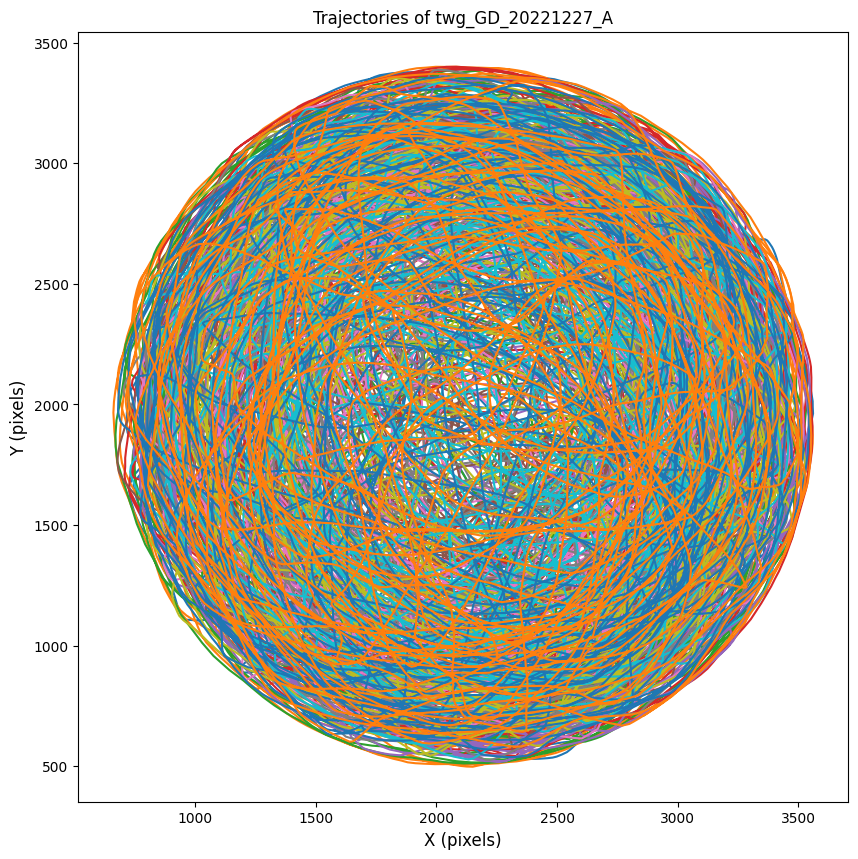

In [32]:
fig, ax_trajectories = plt.subplots(figsize=(10,10))
time_range= (0, 300) # SET HERE THE RANGE IN SECONDS FOR WHICH YOU WANT TO PLOT THE POSITIONS
file_name = file_name = tr.params['path']
get_name = file_name.split("/")
img_name = get_name[-1][0:-4]
frame_range = range(time_range[0]*tr.params['frame_rate'], time_range[1]*tr.params['frame_rate'],1)
for i in range(tr.number_of_individuals):
  ax_trajectories.plot(tr.s[frame_range,i,0], tr.s[frame_range,i,1])
  ax_trajectories.set_aspect('equal','box')
  ax_trajectories.set_title('Trajectories of ' + img_name,fontsize=12)
  ax_trajectories.set_xlabel('X (pixels)',fontsize=12)
  ax_trajectories.set_ylabel('Y (pixels)',fontsize=12)

destination_path = './output/'
#destination_path = os.path.join(base_path, 'uq-bio23/output')
#destination_path_1 = os.path.join(base_path, 'uq-bio23/output', 'trajectories')
if path.exists(destination_path) == False:
  os.mkdir(destination_path)

fig.savefig(destination_path + "trajectories_" + img_name + '.png')

Look at the figure above.

What are the units of the X and Y axis?
Where is the origin (0,0) of the positions?

## Centering trajectories

In case one is interested in setting the reference origin to be the center of the arena.

In [33]:
help(tr.estimate_center_and_radius_from_locations)

Help on method estimate_center_and_radius_from_locations in module trajectorytools.trajectories:

estimate_center_and_radius_from_locations(in_px=False) method of trajectorytools.trajectories.Trajectories instance
    Assumes that the trajectories are restricted to a circular area and
    estimates its center and radius from the trajectories
    
    :param in_px: If True, the results are given in the original
    frame of reference and scale (usually pixels).



In [34]:
help(tr.origin_to)

Help on method origin_to in module trajectorytools.trajectories:

origin_to(new_origin) method of trajectorytools.trajectories.Trajectories instance
    Places origin of frame of reference in a given location
    
    :param new_origin: Point that will become our new origin.
    It is expressed in the original frame of reference (usually px).



In [35]:
#define center and radius of arena
center, radius = tr.estimate_center_and_radius_from_locations(in_px=True)

# Since the arena of the setup was circular and the fish visited the borders of the arena
# we can use the method estimate_center_and_radius_from_locations to center the trajectories
# in the arena

# Set the flag in_pxs to True to estimate the center and radius of the original trajectories
# without considering previous translations of the origin of coordinates or previous changes of units
center, radius = tr.estimate_center_and_radius_from_locations(in_px=True)
tr.origin_to(center)

To convert the length unit to body length (BL), we use the method `new_length_unit`

In [36]:
#define body length

# In our case we know that the body_length_px is a good estimate for the body length
# since we loaded the trajectories with the method from_idtrackerai this value is 
# stored in the tr.params disctionary
body_length = tr.params['body_length_px']

# converts the current length unit (pixels) to body_length
tr.new_length_unit(body_length, 'BL')

0.006060606060606061

Second plot after having centered the trajectories array, and using body length (BL) as the length units. 

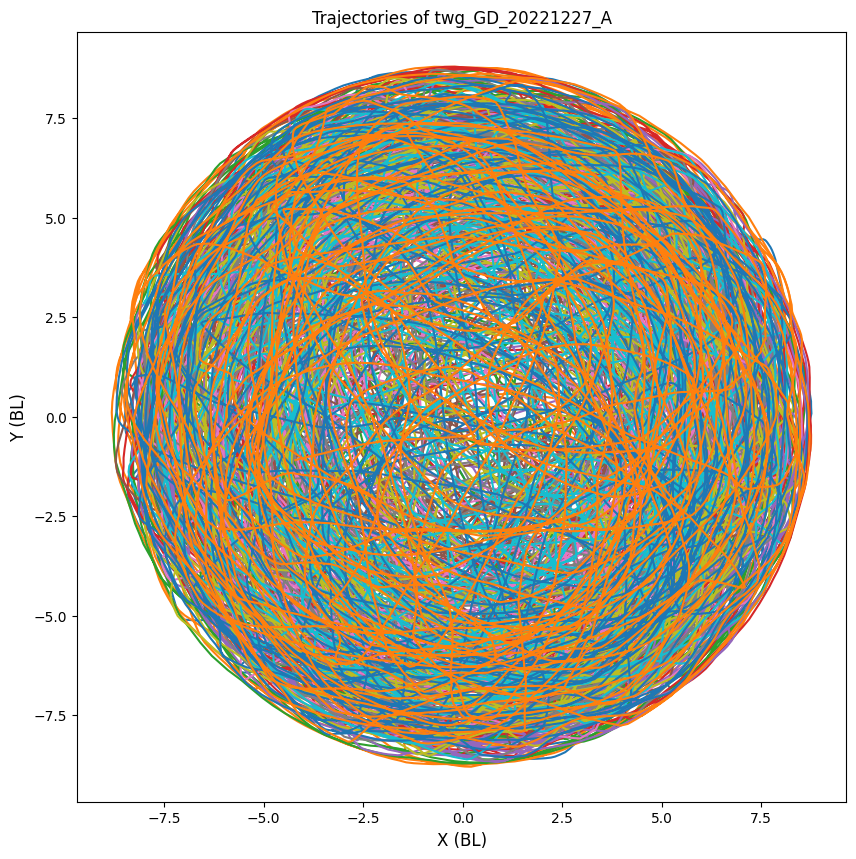

In [37]:
fig, ax_trajectories = plt.subplots(figsize=(10,10))
time_range= (0, 300) # SET HERE THE RANGE IN SECONDS FOR WHICH YOU WANT TO PLOT THE POSITIONS
file_name = tr.params['path']
get_name = file_name.split("/")
img_name = get_name[-1][0:-4]
frame_range = range(time_range[0]*tr.params['frame_rate'], time_range[1]*tr.params['frame_rate'],1)
for i in range(tr.number_of_individuals):
  ax_trajectories.plot(tr.s[frame_range,i,0], tr.s[frame_range,i,1])
ax_trajectories.set_aspect('equal','box')
ax_trajectories.set_title('Trajectories of ' + img_name,fontsize=12)
ax_trajectories.set_xlabel('X (BL)',fontsize=12)
ax_trajectories.set_ylabel('Y (BL)',fontsize=12)

path_output = './output/'
fig.savefig(path_output + "centered_trajectories_" + img_name)

Looks better! 
Time for a challenge!

### **Ex 6:** 

Plot each animal trajectory in a separated plot. One figure dedicated to each one of the animal's trajectory. 

In [38]:
#solution ex6
def plot_individual_trajectories(tr):
    time_range= (0, 300) # SET HERE THE RANGE IN SECONDS FOR WHICH YOU WANT TO PLOT THE POSITIONS
    file_name = tr.params['path']
    get_name = file_name.split("/")
    img_name = get_name[-1][0:-4]
    frame_range = range(time_range[0]*tr.params['frame_rate'], time_range[1]*tr.params['frame_rate'],1)

    for focal in range(tr.number_of_individuals):
      # create one figure for each animal trajectory

SyntaxError: ignored

In [ ]:
plot_individual_trajectories(tr)

For the next exercise, you need the following information:

* Position (coordinates): tr.s
* Velocity vector: tr.v
* Acceleration vector: tr.a

**Magnitude of vectors** are given by:
* Velocity: tr.speed
* Acceleration: tr.acceleration

Normalized vectors:
* Velocity: tr.e





In [ ]:
tr.speed

In [ ]:
tr.acceleration

### **Ex 7**:

Create a funtion named plot_main_metrics, following the conditons:
* Input: file_name
* Output: One plot with 3 subplots. The subplots share the x axis, which represents the time (s). The Y axis of the 3 subplots should represent:
 - 1) The average group **distance to the origin** ($BL$)
 - 2) The **speed** of all the animal, each one represented by a different colors ($BL/s$)
 - 3) The **acceleration** of each animal ($BL/s^2$)

In [39]:
# Complete the funtion:

def plot_main_metrics(tr):
    #tr = tt.Trajectories.from_idtrackerai(file_name, 
                                      #interpolate_nans=True,
                                      #smooth_params={'sigma': 0})

    fig, ax = plt.subplots(3,figsize=(15,15), sharex=True)
    time_range= (0, 30) # SET HERE THE RANGE IN SECONDS FOR WHICH YOU WANT TO PLOT THE VARIABLES
    frame_range = range(time_range[0]*tr.params['frame_rate'], time_range[1]*tr.params['frame_rate'],1)

    get_name = file_name.split("/")
    img_name = get_name[-1][0:-4]

    for focal in range(tr.number_of_individuals):
        ax[0].plot(np.asarray(frame_range)/tr.params['frame_rate'],tr.distance_to_origin[frame_range, focal])
        ax[1].plot(np.asarray(frame_range)/tr.params['frame_rate'],tr.speed[frame_range, focal])
        ax[2].plot(np.asarray(frame_range)/tr.params['frame_rate'],tr.acceleration[frame_range, focal])
        plt.subplots_adjust(hspace = 1.)

        ax[0].set_xlabel('t (s)',fontsize=14)
        ax[0].set_ylabel('Distance to origin (BL)',fontsize=14)
        ax[0].tick_params(labelsize=14)

        #ax[1].set_xlabel(#to be completed)
        #ax[1].set_ylabel(#to be completed)
        #ax[1].tick_params(#to be completed)

        ax[2].set_xlabel('t (s)',fontsize=14)
        ax[2].set_ylabel(r'Acceleration ($BL/s^2$)',fontsize=14)
        ax[2].tick_params(labelsize=14)

    path_output = './output/'
    fig.savefig(path_output + "dst_speed_acc_" + img_name)

Run the function *plot_main_metrics(trajectories)*

In [ ]:
plot_main_metrics(tr)

# Working with multiple videos

If you recorded several videos during your experiment and you want to apply a similar data analysis to all your files. You can iterate over your experimental files using a *for loop*.

Create a list with the files of the experiment

---



In [40]:
trajectories_files = ['./trajectories_wo_gaps/twg_GD_20221227_A.npy', './trajectories_wo_gaps/twg_GD_20221227_B.npy']

*for file_name in trajectories_files:*    
        # Load trajectory
        # plots main metrics 




### **Ex 8**:

Compare with the previous plot and check if it looks the same. Why?

Add an additional step, so that the units in the subplot units are in $BL$, $BL/s$ and $BL/s^2$ respectively (instead of pixels)

In [ ]:
for file_name in trajectories_files: 
    tr = tt.Trajectories.from_idtrackerai(file_name, 
                                      interpolate_nans=True,
                                      smooth_params={'sigma': 0})
  
    plot_main_metrics(tr)


In [ ]:
# don't forget to load file B in the cell that gets the npy files from github

This notebook shows different analysis routines for trajectories of groups extracted with [idtracker.ai](idtracker.ai). If you use this code and/or data generated with [idtracker.ai](idtracker.ai), please cite:

**Romero-Ferrero, F., Bergomi, M.G., Hinz, R.C., Heras, F.J.H., de Polavieja, G.G., Nature Methods, 2019. idtracker.ai: tracking all individuals in small or large collectives of unmarked animals (F.R.-F. and M.G.B. contributed equally to this work. Correspondence should be addressed to G.G.d.P: gonzalo.polavieja@neuro.fchampalimaud.org)**

Some of the methods in this script are also available as part of a Matlab toolkit, idSocial (http://www.idtracker.es/idsocial) that was used and developed for the analysis of the article

**Hinz, R. C., & de Polavieja, G. G. (2017). Ontogeny of collective behavior reveals a simple attraction rule. Proceedings of the National Academy of Sciences, 201616926.** 

To load and analyse the trajectories we will be using the python library *trajectorytools*, you can install with `pip install trajectorytools`. If you use it, please cite:

**Heras, F. J. H., Romero-Ferrero, F., Hinz, R. C., & de Polavieja, G. G. (2019). Deep attention networks reveal the rules of collective motion in zebrafish. PLoS computational biology, 15(9), e1007354.**